In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')

In [5]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [9]:
train.drop(columns=['Cabin'],inplace=True)
test.drop(columns=['Cabin'],inplace=True)

In [10]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [11]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [12]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
train['Embarked'].fillna('S',inplace=True)

In [14]:
test['Fare'].fillna(test['Fare'].mean(),inplace=True)

In [15]:
train_age = np.random.randint(train['Age'].mean() - train['Age'].std(), train['Age'].mean() + train['Age'].std(),177)

In [16]:
test_age = np.random.randint(test['Age'].mean() - test['Age'].std(),test['Age'].mean()+test['Age'].std(),86)

In [17]:
#train['Age'][train['Age'].isnull()].shape      -> to get only true values

train['Age'][train['Age'].isnull()] = train_age

C:\Users\Asus\AppData\Local\Temp\ipykernel_2916\2343211413.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age'][train['Age'].isnull()] = train_age


In [18]:
test['Age'][test['Age'].isnull()] = test_age

C:\Users\Asus\AppData\Local\Temp\ipykernel_2916\4013316382.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Age'][test['Age'].isnull()] = test_age


In [19]:
# EDA 

In [20]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,20.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [21]:
train.groupby(['Pclass'])['Survived'].mean() *100

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

In [22]:
train.groupby(['Sex'])['Survived'].mean() *100

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

In [23]:
train.groupby(['Embarked'])['Survived'].mean()*100

Embarked
C    55.357143
Q    38.961039
S    33.900929
Name: Survived, dtype: float64

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


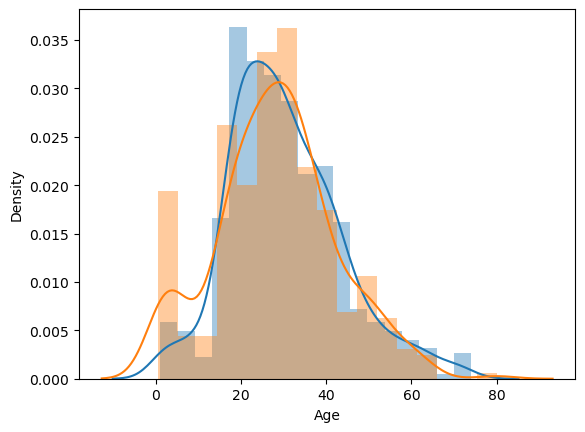

In [24]:
sns.distplot(train['Age'][train['Survived']==0])
sns.distplot(train['Age'][train['Survived']==1])
plt.show()

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


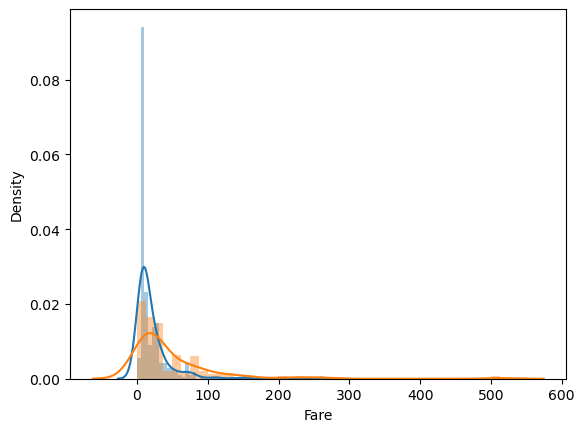

In [25]:
sns.distplot(train['Fare'][train['Survived']==0])
sns.distplot(train['Fare'][train['Survived']==1])
plt.show()

In [26]:
train.drop(columns=['Ticket'],inplace=True)
test.drop(columns=['Ticket'],inplace=True)

In [27]:
train['family']=train['SibSp'] + train['Parch'] + 1
test['family']=test['SibSp'] + test['Parch'] + 1

In [28]:
train['family'].value_counts()
test['family'].value_counts()

1     253
2      74
3      57
4      14
5       7
7       4
11      4
6       3
8       2
Name: family, dtype: int64

In [29]:
train.groupby(['family'])['Survived'].mean()*100

family
1     30.353818
2     55.279503
3     57.843137
4     72.413793
5     20.000000
6     13.636364
7     33.333333
8      0.000000
11     0.000000
Name: Survived, dtype: float64

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='family', ylabel='Density'>

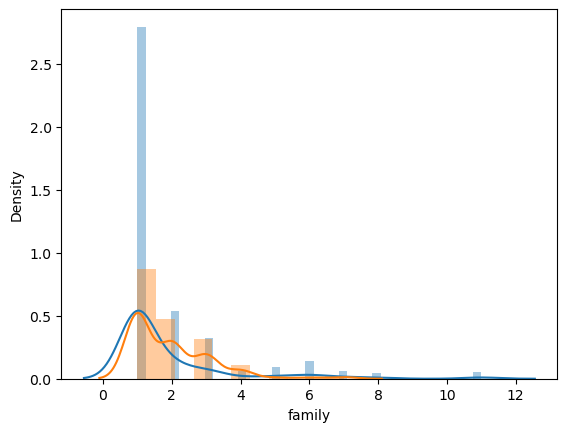

In [30]:
sns.distplot(train['family'][train['Survived']==0])
sns.distplot(train['family'][train['Survived']==1])


In [31]:
def cal(number):
    if number == 1:
        return 'Alone'
    elif number > 1 and number <5:
        return 'Medium'
    else:
        return 'Large'

In [32]:
train['family_size'] = train['family'].apply(cal)

In [33]:
test['family_size'] = test['family'].apply(cal)


In [34]:
train.drop(columns=['SibSp','Parch','family'],inplace=True)

In [35]:
test.drop(columns=['SibSp','Parch','family'],inplace=True)

In [36]:
print(train.shape)
print(test.shape)

(891, 9)
(418, 8)


In [37]:
passengerId = test['PassengerId'].values

In [38]:
train.drop(columns=['Name','PassengerId'],inplace=True)

In [39]:
test.drop(columns=['Name','PassengerId'],inplace=True)

In [40]:
train.shape

(891, 7)

In [41]:
train= pd.get_dummies(train,columns=['Pclass','Sex','Embarked','family_size'],drop_first=True)

In [42]:
train

,Survived,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_size_Large,family_size_Medium
0,0,22.0,7.2500,0,1,1,0,1,0,1
1,1,38.0,71.2833,0,0,0,0,0,0,1
2,1,26.0,7.9250,0,1,0,0,1,0,0
3,1,35.0,53.1000,0,0,0,0,1,0,1
4,0,35.0,8.0500,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,13.0000,1,0,1,0,1,0,0
887,1,19.0,30.0000,0,0,0,0,1,0,0
888,0,20.0,23.4500,0,1,0,0,1,0,1
889,1,26.0,30.0000,0,0,1,0,0,0,0


In [43]:
test = pd.get_dummies(test,columns=['Pclass','Sex','Embarked','family_size'],drop_first=True)

In [44]:
test.shape

(418, 9)

In [45]:
X = train.iloc[:,1:].values

In [46]:
y = train.iloc[:,0].values

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [49]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()

In [50]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [51]:
y_pred = classifier.predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.7206703910614525

In [53]:
Xf = test.iloc[:,:].values

In [54]:
y_final = classifier.predict(Xf)

In [55]:
y_final.shape

(418,)

In [56]:
passengerId.shape

(418,)

In [57]:
final = pd.DataFrame()

In [58]:
final['passengerId'] = passengerId
final['survived'] = y_final

In [59]:
final

,passengerId,survived
0,892,0
1,893,0
2,894,1
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [60]:
final.to_csv('titanic_submission.csv',index=False)

In [61]:
final

,passengerId,survived
0,892,0
1,893,0
2,894,1
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
